In [1]:
# Crear una instancia del ambiente
import numpy as np
import matplotlib.pyplot as plt
from agente import AgenteQLearning
from ambiente import AmbienteDiezMil
from template import Validador
from IPython.display import clear_output
from tqdm import tqdm

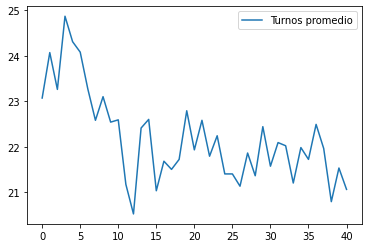

 40%|████      | 403/1000 [06:52<10:10,  1.02s/it]


KeyboardInterrupt: 

In [2]:
# Inicialización del gráfico
plt.ion()  # Activa el modo interactivo
seed = 42
np.random.seed(seed)

ambiente = AmbienteDiezMil()

# Crear un agente de Q-learning
agente = AgenteQLearning(ambiente, alpha=0.001, gamma=0.1, epsilon=0.05)
episodios = 1000
epochs = 1000

vals = []

# Entrenar al agente con un número de episodios
for _ in tqdm(range(epochs)):
    agente.entrenar(episodios, verbose=False)
    validador = Validador(ambiente)
    if _ % 10 == 0:
        vals.append(validador.validar_politica(agente.q_table2pol(), 100))
        clear_output(wait=True)
        plt.plot(vals, label="Turnos promedio")
        plt.legend()
        plt.show()

plt.ioff()  # Desactiva el modo interactivo

In [4]:
from jugador import JugadorAleatorio
from template import Validador


val = Validador(ambiente)
val_count = 1000
avg = val.validar_politica(agente.q_table2pol(), val_count)
print(f"Validación DeepPurple: {avg}")

val_rand = Validador(ambiente)
jugador = JugadorAleatorio("random")
avg_rand = val_rand.validar_jugador(jugador, val_count)
print(f"Validación Random: {avg_rand}")

Validación DeepPurple: 25.066
Validación Random: 26.927


In [ ]:
%matplotlib inline
import time
# import pylab as pl
from IPython import display


ambiente = AmbienteDiezMil()

# Crear un agente de Q-learning
agente = AgenteQLearning(ambiente)

vals = []

for i, val in enumerate(agente.entrenar(episodios, verbose=True)):
    vals.append(val)
    plt.figure(figsize=(10, 5))
    plt.plot(vals)
    display.clear_output(wait=True)
    # display.display(pl.gcf())
    plt.show()